## Assignment 3 - Liner Regression

We will describe some steps according to the Machine Learning Workflow.

#1. Frame the problem

In this project, we will use Machine Learning for the prediction of disease progression of diabetes in the patients based on their BMI i.e (Body Mass Index). We consider this as a Supervised Learning problem as we have labeled data for every instance. Considering the continuous value of the output i.e the score, it is a regression problem. Using the mean squared error (MSE) as a loss function to measure the average square difference between the actual and predicted scores.

In [94]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#2. Get the data

In [95]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

#3. Explore the data to gain insights.

In [96]:
# First We will convert the data to a pandas dataframe
diabetes_dataframe = pd.DataFrame(diabetes_X, columns=datasets.load_diabetes().feature_names)
diabetes_dataframe['target'] = diabetes_y

In [97]:
# Now we will see the summary statistics of the data
diabetes_dataframe.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [98]:
# After the summary we will now see the correlation matrix of the data
diabetes_dataframe.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


#We will use a scatter plot to demonstrate a relationship between BMI and Target columns from the dataset.

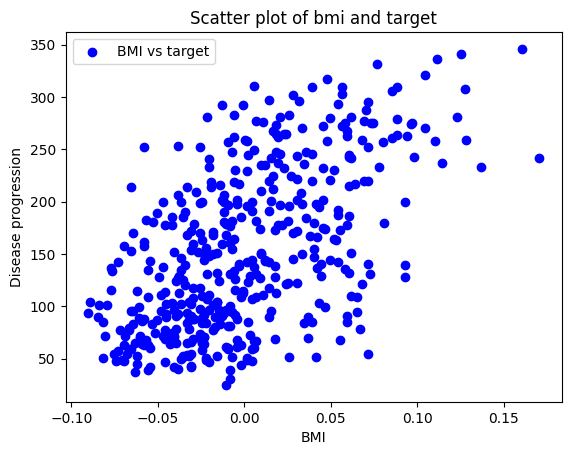

In [99]:
import matplotlib.pyplot as plt
plt.scatter(diabetes_dataframe["bmi"], diabetes_dataframe["target"], color="Blue", marker="o", label="BMI vs target")
plt.xlabel("BMI")
plt.ylabel("Disease progression")
plt.title("Scatter plot of bmi and target")
plt.legend()
plt.show()

#We will now demonstrate a Boxplot for relationship between variable s3 and Blood pressure.

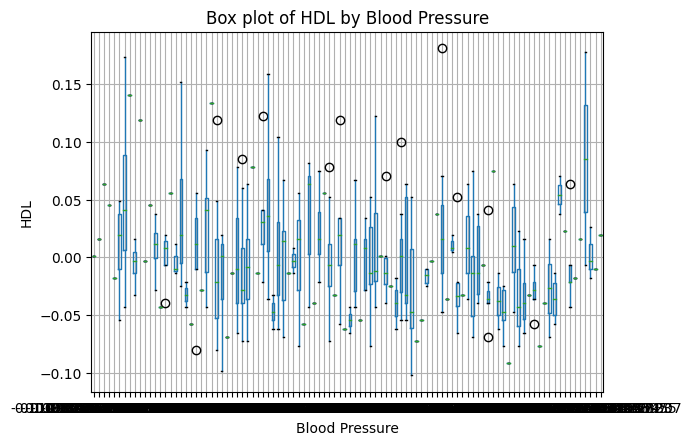

In [100]:
diabetes_dataframe.boxplot(column="s3", by="bp")
plt.xlabel("Blood Pressure")
plt.ylabel("HDL")
plt.title("Box plot of HDL by Blood Pressure")
plt.suptitle("")
plt.show()

#We will demonstrate a Histogram for Age

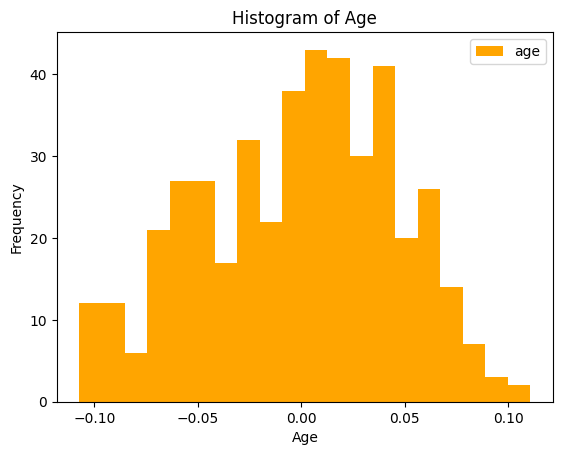

In [101]:
plt.hist(diabetes_dataframe["age"], bins=20, color="Orange", label="age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.legend()
plt.show()

#The below Heat map will show Correlation Matrix of Features and Target.

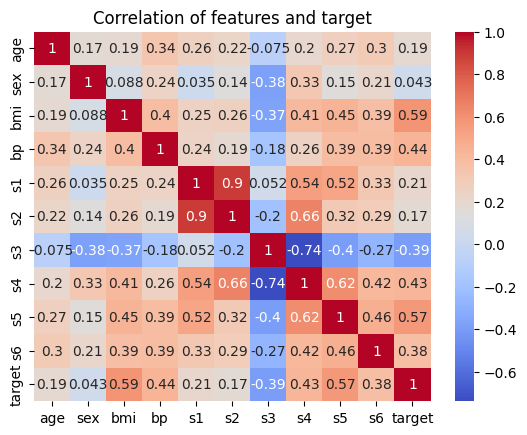

In [102]:
sns.heatmap(diabetes_dataframe.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation of features and target")
plt.show()

We will show Univariate Linear Regression

In [103]:
from sklearn.model_selection import train_test_split
# We are selecting a single feature .i.e BMI
X = diabetes_X[:, np.newaxis, 2]

In [104]:
# We are splitting the Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, diabetes_y, test_size=0.2, random_state=0)

# We are creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
#Now lets make predictions using the trained model on the test data
y_pred = model.predict(X_test)
print(y_pred)

[255.17426905 211.79462571 161.0087018  129.26749936 196.98206457
 247.76798848 123.97729895 174.76322286 205.44638522 198.04010465
  95.41021675 198.04010465 115.5129783  107.04865765 239.30366783
 130.32553944  94.35217667 101.75845724  70.01725479 191.69186416
 180.05342327 163.12478196 128.20945928 209.67854555 206.5044253
 169.47302245 111.28081797 108.10669773 156.77654147 177.9373431
 149.3702609  100.70041716 141.96398033 140.90594025 146.19614066
 172.6471427  136.67377993 143.02202042 153.60242123 185.34362367
  88.00393618 141.96398033 145.13810058 148.31222082 182.16950343
  92.23609651 133.49965968 176.87930302 119.74513862 185.34362367
 130.32553944 105.99061756 170.53106253 144.0800605  194.86598441
 134.55769976 182.16950343 148.31222082 147.25418074 164.18282204
 192.74990424 175.82126294 201.2142249  131.38357952 211.79462571
 180.05342327  91.17805642 199.09814473 193.80794433  80.59765561
 127.15141919 127.15141919 122.91925887 188.51774392 157.83458156
 128.2094592

#7. Present the Solution

In [106]:
# We will print the coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [981.65543614]


In [107]:
# We will print the intercept
print('Intercept: \n', model.intercept_)

Intercept: 
 152.28824927379569


In [108]:
# We will display the mean squared error in order to check how close a line of regression is to a set of points
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 4150.68


In [109]:
# We will calculate the mean squared error for the train set
print('Mean squared error for the train set: %.2f' % metrics.mean_squared_error(y_train, model.predict(X_train)))

Mean squared error for the train set: 3827.82


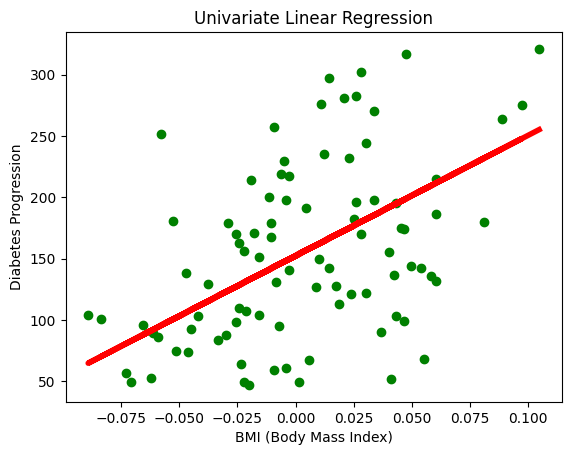

In [110]:
# We will display Unvariate Linear Regression for Diabetes Progression and Body Mass Index
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red', linewidth=4)
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Diabetes Progression')
plt.title('Univariate Linear Regression')
plt.show()

##Considering the above calculations of Coefficient, Intercept, Mean Squared Error and it's train set, we can conclude that this model is not a good fit for the data. It displays a questionable linear assumption, a low explanatory power and a high prediction error.